# **Latar Belakang**
Sebuah Supermarket di Kota A memiliki database yang memuat data-data para pelanggannya. Ketatnya persaingan antar Supermarket di Kota A membuat pihak manajemen khawatir apakah terobosan yang dilakukan pada Supermarket tersebut sudah tepat sasaran atau meleset. Jadi tim manajemen meminta tim data analyst untuk menganalisa data pelanggan yang dimiliki oleh Supermarket tersebut. Dari hasil analisa tersebut diharapkan dapat memahami perilaku pelanggan pada saat membeli suatu produk. Dari data perilaku pelanggan tersebut, tim manajemen dapat menyesuaikan strategi apa yang cocok untuk digunakan agar Supermarket tersebut menjadi lebih baik. 

# **Pernyataan Masalah**
Dari Latar Belakang diatas sudah dijelaskan bahwa tim data analyst diminta untuk menganalisa data pelanggan. Beberapa poin yang diharapkan akan terjawab oleh data analsyt pada Supermarket tersebut adalah:
1. Bagaimana karakteristik / perilaku customer dan pola belanjanya?
2. Apakah Campaign yang dilakukan diterima dengan baik oleh Pelanggan?
3. Dimanakah Customer lebih sering melakukan transaksi ? (Store, Web, dan Catalogue)
4. Segmentasi Customer dengan melakukan RFM Analysis



# **Stakeholder**
1. Manager Toko
2. Tim Marketing
3. Tim Web

# **Tujuan Analisis**
Tujuan dari analisis Data Pelanggan Supermarket ini adalah untuk menjawab pernyataan masalah yang telah dijabarkan , serta dari jawaban tersebut
kita dapat menarik kesimpulan dan memberikan rekomendasi kepada para Stakeholder dan mungkin disaat dilakukannya analisis akan mendapatkan temuan-temuan baru yang bisa dijadikan rekomendasi.

# **Data Understanding**

In [171]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro

In [172]:
pd.options.display.max_columns=None

In [173]:
# Load Dataset
df = pd.read_csv("Supermarket Customers.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [174]:
df.shape

(2240, 29)

Dataset memuat data customers dari sebuah supermarket yang memiliki 2240 baris dan 29 kolom, setiap baris menggambarkan informasi seorang customer beserta dengan featuresnya. Berikut penjelasan dari setiap kolomnya :

## People
● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products
● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

## Promotion
● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

## Place
● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month


In [175]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Data Cleaning**

In [177]:
# Menampilkan gambaran informasi dari setiap Kolom
list_kolom = []

for i in df.columns:
    list_kolom.append([i,
                    df[i].dtypes,
                    df[i].isna().sum(),
                    df[i].nunique(),
                    df[i].unique()])

df_info = pd.DataFrame(list_kolom, columns = ['dataFeatures', 'dataType', 'null', 'unique','uniqueSample'])
df_info

,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,24,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0,3,"[0, 1, 2]"
6,Teenhome,int64,0,3,"[0, 1, 2]"
7,Dt_Customer,object,0,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


Dari tabel diatas dapat dilihat bahwa :
- Dapat dilihat bahwa kolom 'Z_CostContact' dan 'Z_Revenue' hanya memiliki nunique 1, maka kolom ini dapat di drop karena hanya memiliki 1 value dan tidak dibutuhkan pada analisis.
- Tedapat Missing Value pada kolom 'Income' sebanyak 24 baris
- Tipe Data Dt_Customer masih berbentuk Object 

In [178]:
# Drop kolom 'Z_CostContact' dan 'Z_Revenue'
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

## **Handling Duplicate Value**

In [179]:
# Check jumlah duplikat
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat

In [180]:
# Check jumlah duplikat pada kolom ID
df['ID'].duplicated().sum()

np.int64(0)

Kolom ID tidak memiliki value yang duplikat, coba kita cek duplikat dengan menggunakan semua kolom tetapi tanpa menggunakan kolom ID


In [181]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Hapus kolom ID dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('ID')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom ID)
duplicate_rows = df[df.duplicated(subset=subset_columns)]
duplicate_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,0
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,0
281,10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,0
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,0
363,933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,4838,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,0
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1
2225,4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0


Dengan menggunakan subset semua kolom tanpa kolom 'ID' ditemukan 182 kolom duplikat, maka data duplikat ini dapat di delete.

In [182]:
# Drop baris data duplikat
df.drop_duplicates(subset=subset_columns, inplace=True)

In [183]:
# Check jumlah data setelah drop duplicate
len(df)

2058

Setelah handle duplicate, data yang kita punya sekarang berjumlah 2058 

## **Check Missing Value**

In [184]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


Tabel diatas adalah tabel yang memiliki missing value pada kolom 'Income' sebanyak 24 baris. Nanti kita akan menghandle missing valuenya.

## **Check Outliers**

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\2617828910.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


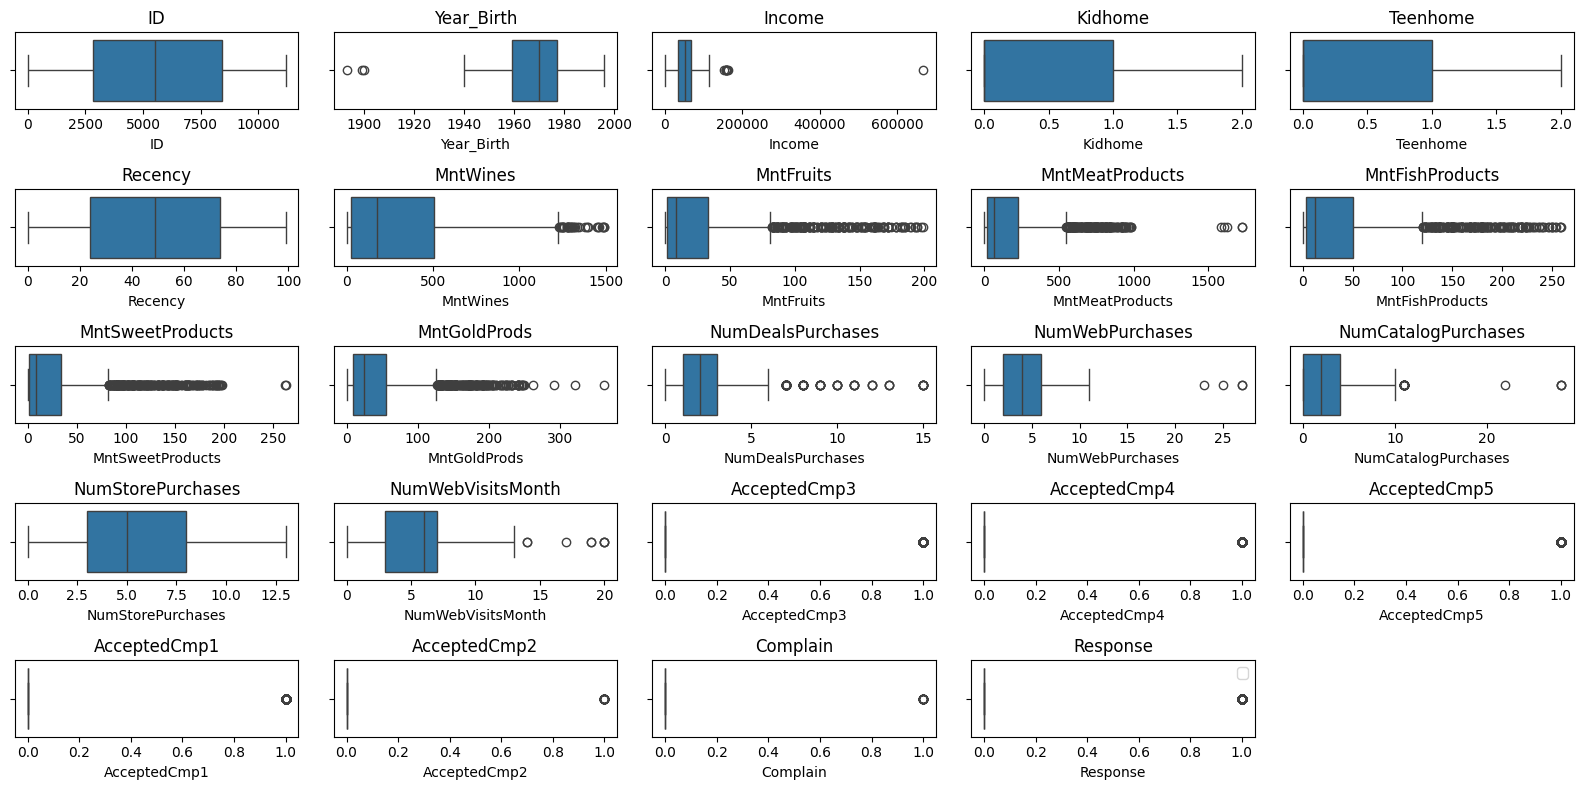

In [185]:
# Membuat Boxplot dari seluruh data yang numerik
column_numerical = []

for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        column_numerical.append(i)

plt.figure(figsize=(16, 8))  
for i, column in enumerate(column_numerical):
    plt.subplot(5, 5, i + 1)  
    sns.boxplot(data=df, x=column)
    plt.title(column)
plt.legend()
plt.tight_layout()
plt.show()

Kesimpulan dari boxplot diatas :
- Sekilas dapat dilihat semua grafik tidak terdistribusi normal, mungkin hanya kolom Recency yang terdistribusi normal
- Terlihat ada data outliers pada grafik Income, dimana Incomenya lebih besar dari 600.000
- Terlihat ada data outliers pada grafik year_birth, dimana Year_birth (tahun kelahiran) nya sebelum tahun 1920
- Disini saya akan fokus hanya pada handling outliers Income dan Year_Birth saja, karena saya asumsikan ada kemungkinan pelanggan yang membeli lebih banyak produk dari rata-rata pembelian pelanggan yang lainnya.

## **Handling Outliers**

Check outliers pada kolom Income dan Year_Birth

In [186]:
# Check Income yang sudah diurutkan dari yang terbesar
df.sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,0
2079,10339,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,0
2081,3117,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,0
2084,5250,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,1


semakin yakin saya denfga income 666.666 adalah outlier, karena income terbesar ke-2 hanya sebesar 162.397, maka sebaiknya Income 666.666 di delete karena dapat mempengaruhi analisa data

In [187]:
# Delete outliers di kolom Income
df.drop(df[df['ID']==9432].index, inplace=True)

In [188]:
df.shape

(2057, 27)

In [189]:
df[df['Year_Birth']<=1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


Saya mengasumsikan 3 data diatas adalah outlier yang harus di delete dengan alasan tidak mungkin umur lebih 100 tahun masih berbelanja ke supermarket.

In [190]:
# Hapus outier di kolom Year_Birth
df.drop(df[df['ID']==7829].index, inplace=True)
df.drop(df[df['ID']==11004].index, inplace=True)
df.drop(df[df['ID']==1150].index, inplace=True)

Text(0.5, 1.0, 'Income')

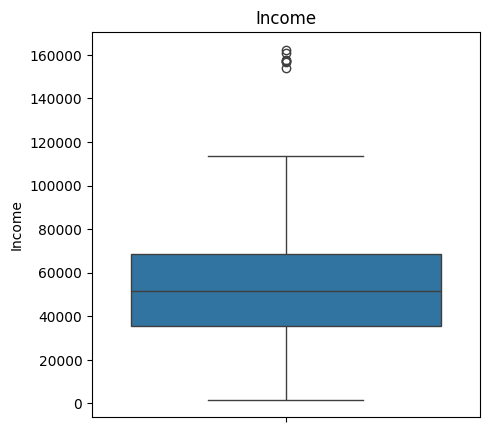

In [191]:
# Membuat Boxplot pada kolom Income
plt.figure(figsize=(5,5))
sns.boxplot(df['Income'])
plt.title('Income')

In [192]:
df[df['Income']>= 120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


disini saya asumsikan 7 data pada tabel diatas bukan outlier, hanya saja pendapatan pelanggan di tabel diatas memang jauh diatas rata-rata.

In [193]:
df.shape

(2054, 27)

## **Mengisi Missing Value**

Sebelumnya sudah diketahui ada 24 missing value pada kolom income, sekarang missing value tersebut akan kita isi.

In [194]:
# Melihat Median dari Income berdasarkan Education
median_values = df.groupby('Education')['Income'].median()
median_values

Education
2n Cycle      46779.0
Basic         20194.0
Graduation    52224.5
Master        51257.0
PhD           55005.0
Name: Income, dtype: float64

Diatas adalah hasil Median dari kolom Income berdasarkan Education yang dimiliki oleh Customer

In [195]:
# Mengisi Missing Values berdasarkan Median Income tiap Education
for edu, median in median_values.items():
    df.loc[(df['Income'].isna()) & (df['Education'] == edu), 'Income'] = median

Mengisi Missing Value dengan Median dari kolom Income Berdasarkan Education yang dimiliki oleh Customer

In [196]:
# Cek Missing Value pada Kolom Income
df['Income'].isna().sum()

np.int64(0)

Sudah tidak ada Missing Value dikolom Income

## **Ubah Tipe Data DT_Customer**

In [197]:
# Mengubah Tipe Data Dt_Customer menjadi Date Time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Mengubah tipe data pada kolom Dt_Customer yang sebelumnya tipe datanya adalah Object menjadi Datetime

## **Merubah Value Pada Kolom Education**

In [198]:
# Melihat total pengulangan nilai Unique pada kolom Education
df['Education'].value_counts()

Education
Graduation    1029
PhD            449
Master         341
2n Cycle       186
Basic           49
Name: count, dtype: int64

Pada kolom 'Education' terdapat 2 values yang memaksudkan tingkat pendidikan yang sama, yaitu 'Master' dan '2n Cycle' (berdasarkan riset dari beberapa sumber di internet) maka kedua values ini akan disimplifikasi dengan merubahnya menjadi 'Master' yang lebih umum.

In [199]:
# Mensimplifikasi values dalam kolom education (2n Cycle menjadi master)
df['Education'] = df['Education'].replace('2n Cycle', 'Master') 
df['Education'].value_counts()

Education
Graduation    1029
Master         527
PhD            449
Basic           49
Name: count, dtype: int64

## **Merubah Value pada kolom Marital Status**

In [200]:
# Melihat total pengulangan nilai Unique pada kolom Marital_status
df['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    519
Single      447
Divorced    215
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [201]:
# Merubah nilai Alone, Yolo, dan Absurd menjadi Single
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single')

# Merubah nilai Widow menjadi Divorced
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Divorced')
df['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    519
Single      454
Divorced    286
Name: count, dtype: int64

## **Menambahkan Kolom Baru**

### **Tambah Kolom MntTotal**

In [202]:
# Menambah Kolom MntTotal
total_amount= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.insert(loc=15, column='MntTotal', value=total_amount)

### **Tambah Kolom Freq_Purchases**

In [203]:
# Menambah Kolom Frequensi pembelian yang dilakukan Customer
df.insert(loc=21, column='Freq_Purchases', value= df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])

### **Tambah Kolom Generation**

Karena pada Dataset tidak diberitahukan rentang dataset pasti maka kita tidak dapat mengetahui umur pasti dari Customer melainkan hanya pada tahun lahir Customer , oleh karena itu saya membuat Kolom baru yang bernama Generation untuk mengkategorikan tahun lahir Customer berdasarkan Generasi
1. Pre Boomer : Kelahiran sebelum tahun 1946
1. Baby Boomer: Kelahiran sekitar tahun 1946 hingga 1964.
2. Generasi X: Kelahiran sekitar tahun 1965 hingga 1980.
3. Generasi Y (Millennials): Kelahiran sekitar tahun 1981 hingga 1996.
4. Generasi Z: Kelahiran setelah tahun 1996.

In [204]:
# Menambah kolom Generation
df['Generation'] = pd.cut(df['Year_Birth'], bins=[1939, 1945, 1964, 1980, 1996,], 
                          labels=['Pre Boomer', 'Baby Boomer', 'Generasi X', 'Millennials'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,0,0,0,0,0,0,1,Baby Boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,0,0,0,0,0,0,0,Baby Boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,0,0,0,0,0,0,0,Generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,0,0,0,0,0,0,0,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,0,0,0,0,0,0,0,Millennials
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,0,0,0,0,0,0,0,Generasi X
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,0,1,0,0,0,0,0,Millennials
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,0,0,0,0,0,0,0,Baby Boomer


In [205]:
# Melihat Nilai Unique beserta total pengulangannya yang ada pada kolom Generation
df['Generation'].value_counts()

Generation
Generasi X     984
Baby Boomer    697
Millennials    350
Pre Boomer      23
Name: count, dtype: int64

### **Tambah Kolom Income_Category**

In [206]:
# Menampilkan Uji Statistik Deskriptif pada kolom Income
df['Income'].describe()

count      2054.000000
mean      52042.280672
std       21466.341385
min        1730.000000
25%       35691.250000
50%       51609.500000
75%       68146.500000
max      162397.000000
Name: Income, dtype: float64

Berdasarkan Statistik Deskriptif pada kolom Income diatas maka saya melakukan pengelompokan kategori Income berdasarkan range dari quartal pada statistik sebagai berikut :
1. Low = Income yang dalam rentang 1730 sampai 35694 
2. Middle = Income yang dalam rentang 35694 sampai 51650
3. High = Income yang dalam rentang 51650 sampai 68277.5
4. Very High = 68277.5 sampai 162397

In [207]:
# Membuat fungsi untuk membuat kolom baru Income Category
def income_category(income):
    if income <= 35694:
        return 'Low'
    elif income <= 51650:
        return 'Middle'
    elif income <= 68277.5:
        return 'High'
    else:
        return 'Very High'

df['Income_Category'] = df['Income'].apply(income_category)

In [208]:
# Cek Value Count pada kolom Income Categpry
df['Income_Category'].value_counts()

Income_Category
High         514
Middle       514
Low          514
Very High    512
Name: count, dtype: int64

## **Merubah Nama Kolom**

In [209]:
df.rename(columns={'Response': 'AcceptedLastCmp'}, inplace=True)

# **Data Analysis**

In [210]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Freq_Purchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedLastCmp',
       'Generation', 'Income_Category'],
      dtype='object')

In [211]:
# Menampilkan data yang sudah bersih
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Generation,Income_Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,0,0,0,0,0,0,1,Baby Boomer,High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,0,0,0,0,0,0,0,Baby Boomer,Middle
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,0,0,0,0,0,0,0,Generasi X,Very High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Millennials,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,0,0,0,0,0,0,0,Millennials,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,0,0,0,0,0,0,0,Millennials,Low
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,0,0,0,0,0,0,0,Generasi X,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,0,1,0,0,0,0,0,Millennials,High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,0,0,0,0,0,0,0,Baby Boomer,Very High


Data yang sudah bersih ada 2054 baris dan 31 kolom

## **Statistik Deskriptif**

**Melakukan Statistik Deskriptif terhadap seluruh Kategori Produk dan Total Amount (MntTotal)**

In [212]:
# Membuat Statistik Deskriptif seluruh kategori produk dan Total Amount
df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal']].describe().round(2).transpose().sort_values(by='50%',ascending=False)

,count,mean,std,min,25%,50%,75%,max
MntTotal,2054.0,606.45,602.42,5.0,69.0,397.0,1046.50,2525.0
MntWines,2054.0,304.13,336.52,0.0,23.0,174.5,504.00,1493.0
MntMeatProducts,2054.0,167.74,228.28,0.0,16.0,67.0,229.50,1725.0
MntGoldProds,2054.0,43.83,52.01,0.0,9.0,24.0,56.00,362.0
MntFishProducts,2054.0,37.34,54.68,0.0,3.0,12.0,50.00,259.0
MntFruits,2054.0,26.21,39.70,0.0,1.0,8.0,33.00,199.0
MntSweetProducts,2054.0,27.20,41.74,0.0,1.0,8.0,33.75,263.0


Kesimpulan:
1. Total Amount: Pelanggan memiliki rentang belanja yang sangat luas, dari $5 hingga $2525, dengan median sekitar $397.

2. Wines: Produk ini tampaknya sangat populer, dengan pembelian median sebesar $174.5 dan pembelian maksimum hingga $1493.

3. Meat Product: Meskipun median pembelian lebih rendah ($67), ada pelanggan yang menghabiskan hingga $1725 pada produk ini.

4. Gold Product: Median pembelian adalah $24, dengan pembelian maksimum hingga $362.

5. Fish Product: Tampaknya kurang populer dibandingkan dengan Wine atau Meat, dengan median pembelian hanya $12.

6. Sweet Product: Seperti Fish Product, tampaknya kurang populer dengan median hanya $8.

7. Fruits: Sama seperti Sweet Product, Fruits juga memiliki median pembelian yang rendah, yaitu $8.


## **Uji Korelasi**

In [213]:
# Membuat Uji Korelasi Spearman dari seluruh rata2 Amount of Product Category dan Total Amount
df_corr = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal']].corr('spearman').transpose()
df_corr

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
MntWines,1.000000,0.513399,0.819817,0.521260,0.497978,0.573927,0.925361
MntFruits,0.513399,1.000000,0.712896,0.707749,0.689056,0.566726,0.679652
MntMeatProducts,0.819817,0.712896,1.000000,0.726438,0.695658,0.635597,0.938532
MntFishProducts,0.521260,0.707749,0.726438,1.000000,0.703677,0.559955,0.693575
MntSweetProducts,0.497978,0.689056,0.695658,0.703677,1.000000,0.539962,0.667292
MntGoldProds,0.573927,0.566726,0.635597,0.559955,0.539962,1.000000,0.691453
MntTotal,0.925361,0.679652,0.938532,0.693575,0.667292,0.691453,1.000000


<Axes: >

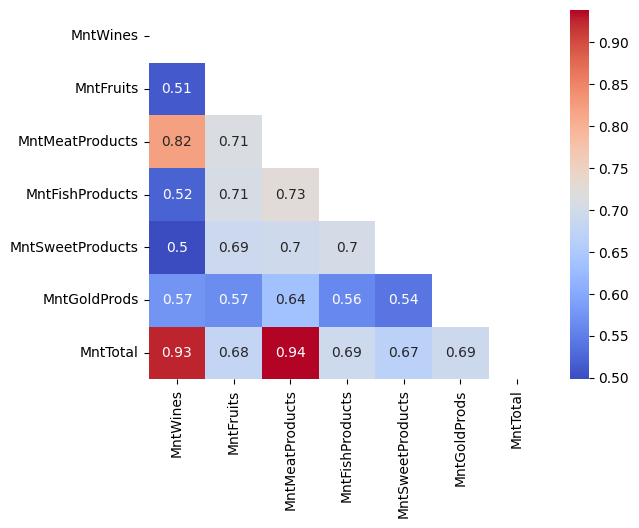

In [214]:
# Membuat Heatmap sebagai visual dari Uji Korelasi Spearman kepada setiap kategori Produk dan total amount
matrix = np.triu(df_corr)
sns.heatmap(
    data = df_corr,
    annot=True ,
    mask = matrix,
    cmap='coolwarm'
)

**Kesimpulan dari Uji Korelasi antara seluruh Kategori Produk dengan Total Amount**
1. Wine dan Total Pengeluaran: Ada korelasi yang sangat kuat antara pembelian Wine (MntWines) dan total pengeluaran (MntTotal) dengan nilai korelasi 0.93, Ini menunjukkan bahwa pelanggan yang membeli Wine cenderung juga membeli produk lain dan menghabiskan lebih banyak uang secara keseluruhan.

2. Meat Products dan Total Pengeluaran: Ada korelasi yang sangat kuat antara Meat Products (MntMeatProducts) dan total pengeluaran dengan nilai korelasi 0.94, yang hampir mendekati 1. Ini menunjukkan bahwa produk daging juga sangat penting dalam menentukan total pengeluaran pelanggan.

3. Korelasi Antar Kategori Produk: Ada korelasi positif antara hampir semua kategori produk, menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung juga membeli jenis produk lain. Misalnya, Wine dan Meat Products memiliki korelasi sebesar 0.82.

In [215]:
# Melihat Customer yang tidak pernah membeli Wines dan Meat Product
display(df[df['MntWines']==0])
display(df[df['MntMeatProducts']==0])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Generation,Income_Category
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,29,2,1,0,3,8,4,0,0,0,0,0,0,0,Generasi X,Low
233,9617,1951,Graduation,Single,15033.0,0,0,2014-04-16,37,0,4,5,6,0,4,19,1,1,0,3,3,4,0,0,0,0,0,0,0,Baby Boomer,Low
444,2106,1974,Master,Married,20130.0,0,0,2014-03-17,99,0,6,3,7,6,12,34,1,1,0,3,8,4,0,0,0,0,0,0,0,Generasi X,Low
445,10364,1959,Graduation,Divorced,23295.0,0,0,2013-07-13,72,0,0,1,2,12,5,20,1,1,0,2,8,3,0,0,0,0,0,0,0,Baby Boomer,Low
738,6516,1989,Basic,Married,17487.0,1,0,2013-03-18,37,0,0,1,7,4,6,18,1,1,0,2,7,3,0,0,0,0,0,0,0,Millennials,Low
862,9553,1987,Graduation,Married,7500.0,0,0,2013-01-09,94,0,2,3,4,1,5,15,1,0,0,3,6,3,0,0,0,0,0,0,0,Millennials,Low
893,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,1,8,3,2,14,1,1,0,2,7,3,0,0,0,0,0,0,0,Millennials,Low
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,16,1,1,0,2,5,3,1,0,0,0,0,0,0,Millennials,Low
1780,5150,1979,Basic,Single,20194.0,1,0,2012-12-17,64,0,4,7,11,10,15,47,2,2,0,3,6,5,0,0,0,0,0,0,0,Generasi X,Low
1861,10241,1975,Master,Divorced,11448.0,0,0,2013-12-15,16,0,0,0,6,2,6,14,1,1,0,2,6,3,0,0,0,0,0,0,0,Generasi X,Low


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Generation,Income_Category
1861,10241,1975,Master,Divorced,11448.0,0,0,2013-12-15,16,0,0,0,6,2,6,14,1,1,0,2,6,3,0,0,0,0,0,0,0,Generasi X,Low


Dari Tabel diatas dapat kita simpulkan bahwa :
1. Dari 2035 Customer hanya 12 Customer yang tidak pernah membeli Wines Product 
2. Dari 2035 Customer hanya 1 Customer yang tidak pernah membeli Meat Product

## **General**

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\2239901711.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(


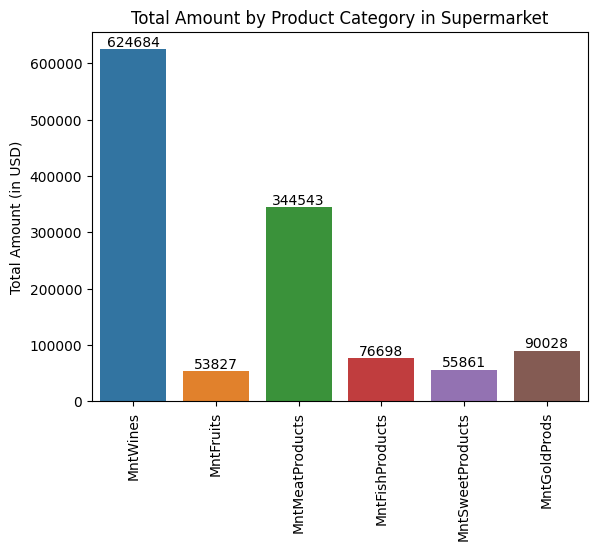

In [216]:
# Membuat variabel baru yang berisikan semua kategori produk
df_product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
# Membuat Bar Chart
ax = sns.barplot(
    data=df_product,
    ci=0,
    estimator='sum'
    )

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Judul dari Bar Chart
plt.title('Total Amount by Product Category in Supermarket')
plt.ylabel('Total Amount (in USD)')
plt.xticks(rotation=90)
plt.show()

Berdasarkan Bar Chart diatas dapat disimpulkan bahwa :
1. Pengeluaran Tertinggi di Kategori Wine: Berdasarkan data, pengeluaran tertinggi oleh pelanggan terjadi di kategori produk Wine, dengan total penjualan yang mencapai 624684 USD.

2. Kategori Meat sebagai Runner-Up: Kategori produk Meat menempati posisi kedua dengan total penjualan sebesar 344543 USD, menunjukkan minat pelanggan yang juga signifikan pada kategori ini.

3. Pengeluaran Menengah di Kategori Fish Product dan Gold Product: Kategori Fish Product dan Gold Product memiliki total penjualan sebesar 76698 USD dan 90028 USD, menunjukkan bahwa kategori ini memiliki daya tarik menengah di antara pelanggan.

4. Pengeluaran Terendah di Kategori Buah dan Sweet: Kategori produk dengan total penjualan terendah adalah Buah dan Sweet, dengan angka sebesar 53827 USD dan 55861 USD, menunjukkan bahwa kategori ini mungkin kurang menarik bagi pelanggan saat ini.

## **Penerimaan Campaign oleh pelanggan**

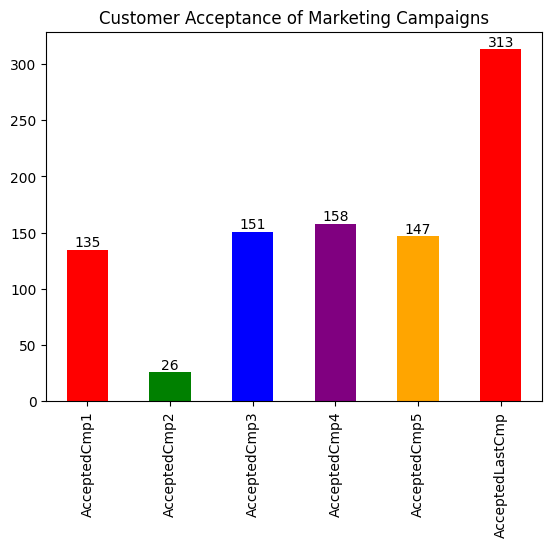

In [217]:
# List warna
colors_list = ['red', 'green', 'blue', 'purple', 'orange']

# Membuat bar chart dan set warna
ax = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedLastCmp']].sum().plot(kind='bar', color=colors_list)

# Menampilkan value dari masing-masing bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Add a title
plt.title('Customer Acceptance of Marketing Campaigns')

# Show the plot
plt.show()

Berdasarkan Bar chart diatas, dapat diberi kesimpulan bahwa:
- Kampanye yang paling diterima dan mendapatkan respon baik oleh pelanggan adalah AcceptedLastCmp (pelanggan menerima penawaran di kampanye terakhir) yang mana dapat membuat 313 customer menerima penawaran dari kampanye tersebut
- Kampanye yang tidak tepat sasaran/strategi yang kurang bagus ada pada AcceptedCmp2 (Kampanye ke 2) dimana hanya dapat membuat 26 customer meneruma penawaran dari kampanye tersebut

## **Proporsi channel pembelian oleh Customer di Supermarket**

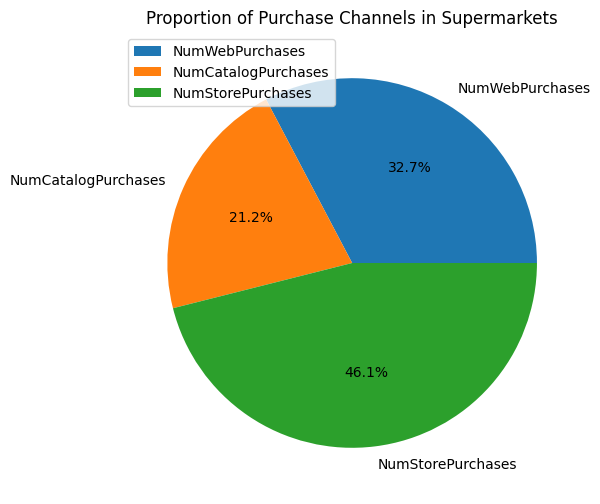

In [218]:
# Membuat Pie Chart total tempat pembelian oleh customer
plt.figure(figsize=(6,6))
df[[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().plot(kind='pie',autopct='%1.1f%%')

# Membuat Judul Pie Chart
plt.title('Proportion of Purchase Channels in Supermarkets')

# Menampilkan Legenda
plt.legend(loc='upper left')
plt.show()

Berdasarkan Pie Chart Distribusi dari pembelian di ketiga channel yang dilakukan oleh Customer diatas dapat disimpulkan :

1. Store: Sebagai saluran dengan proporsi pembelian terbesar (46.1%), ini menunjukkan bahwa toko fisik masih menjadi pilihan utama bagi pelanggan Supermarket.

2. Web: Dengan proporsi 32.7%, pembelian online juga menjadi saluran yang cukup populer, menunjukkan kecenderungan konsumen yang semakin digital.

3. Catalogue: Meskipun memiliki proporsi lebih kecil (21.2%), katalog masih menjadi saluran yang relevan dan mungkin menarik bagi segmen pelanggan tertentu.

Rekomendasi:

1. Optimalkan Pengalaman Toko: Mengingat banyaknya pelanggan yang lebih suka berbelanja di toko, memastikan pengalaman berbelanja yang menyenangkan di toko fisik bisa menjadi prioritas.

2. Tingkatkan Web Experience: Dengan hampir sepertiga pembelian dilakukan secara online, investasi lebih lanjut dalam UX dan UI website bisa sangat bermanfaat.

3. Personalisasi Katalog: Untuk 21.2% pelanggan yang berbelanja melalui katalog, pertimbangkan untuk menawarkan katalog yang lebih terpersonalisasi berdasarkan preferensi pelanggan.

## **Trend Pendaftaran Customer**

In [219]:
# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts = df.resample('M', on='Dt_Customer').size()

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\3243577632.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='Dt_Customer').size()


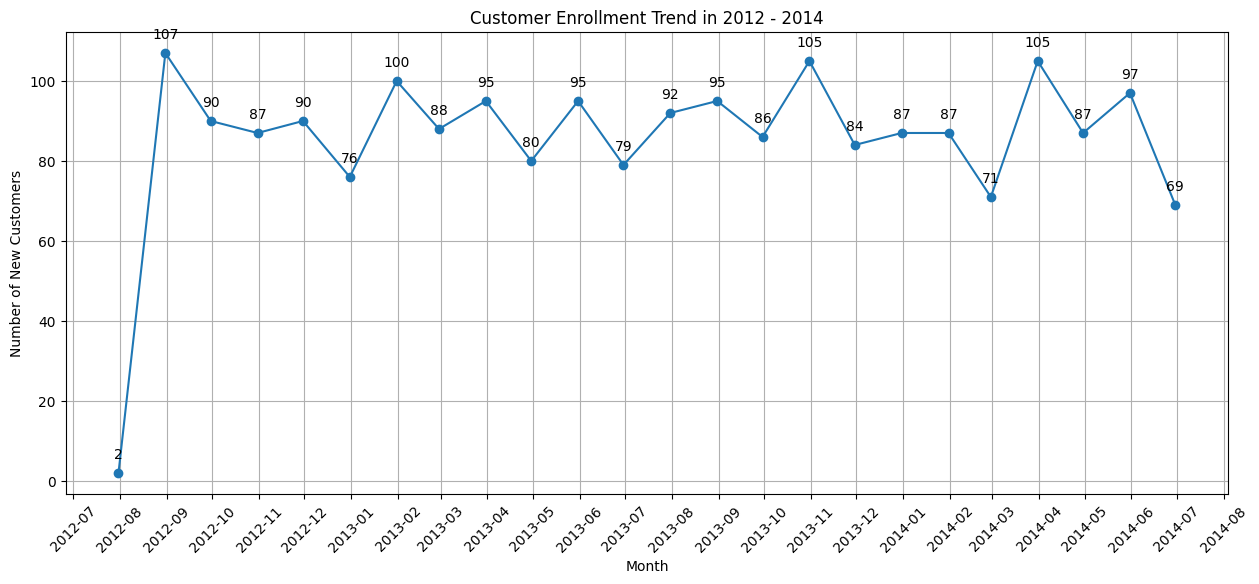

In [220]:
import matplotlib.dates as mdates
# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts_all = monthly_counts.loc['2012-01-01':'2014-12-31']

plt.figure(figsize=(15,6))

# Membuat plot
plt.plot(monthly_counts_all.index, monthly_counts_all.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Enrollment Trend in 2012 - 2014')

# Menambahkan anotasi untuk setiap titik
for i, value in enumerate(monthly_counts_all.values):
    plt.annotate(str(value), (mdates.date2num(monthly_counts_all.index[i]), value), textcoords="offset points", xytext=(0,10), ha='center')

# Mengatur label sumbu x untuk menampilkan setiap bulan
plt.xticks(ticks=monthly_counts_all.index, labels=[x.strftime('%Y-%m') for x in monthly_counts_all.index], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.grid(True)
plt.show()

Kesimpulan:
1. Tren Pendaftaran: Ada variasi dalam jumlah pendaftaran pelanggan dari bulan ke bulan, tetapi tidak ada pola jelas yang terlihat hanya dari data ini.
2. Pendaftaran Tertinggi: Ada beberapa bulan dengan pendaftaran yang lebih tinggi, seperti Septermber 2012 dengan 107 pendaftaran.
3. Pendaftaran Terendah: Juli 2014 menunjukkan pendaftaran terendah dengan hanya 69 pelanggan baru.

Rekomendasi:
1. Analisis Musiman: Jika ada data tambahan mungkin bisa dilakukan untuk melakukan analisis musiman untuk melihat apakah ada pola musiman dalam pendaftaran pelanggan.

## **Pie Chart customer complain**

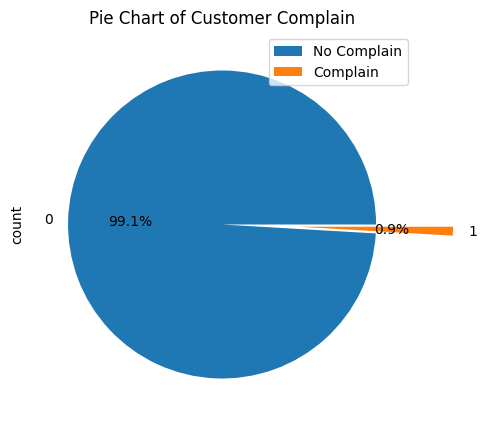

In [221]:
# Membuat Pie Chart of Customers Complain
plt.figure(figsize=(5,5))
df['Complain'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Complain')
plt.legend(('No Complain','Complain'))
plt.show()

kesimpulan :
- Dari Pie Chart diatas dapat dilihat bahwa hanya 0.9% dari total customer yang memiliki complain, ini mengindikasikan bahwa pelayanan yang diberikan sudah sangat memuaskan

Rekomendasi:
- Analisis Keluhan: Walaupun jumlahnya sedikit, tetap penting untuk menganalisis keluhan yang ada untuk mendapatkan wawasan tentang aspek mana yang mungkin perlu ditingkatkan.

## **Analysis Berdasarkan Marital Status**

### **Proporsi Customer Berdasarkan Marital Status**

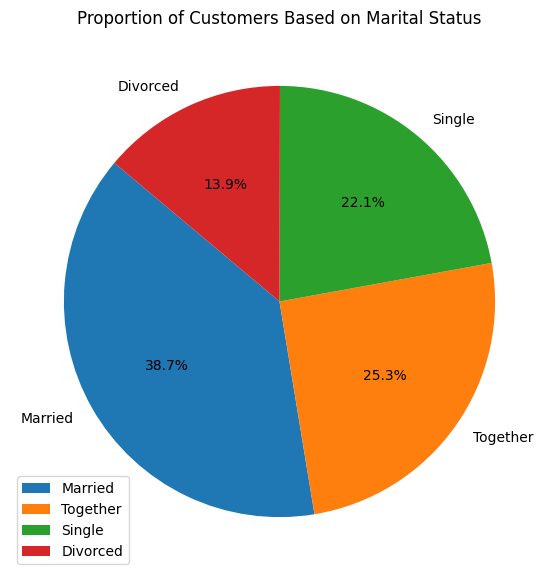

In [222]:
# Membuat diagram lingkaran untuk distribusi kategori pendidikan
plt.figure(figsize=(7, 7))
education_counts = df['Marital_Status'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers Based on Marital Status')
plt.legend()
plt.show()

Berdasarkan Pie Chart Distribusi dari Marital Status diatas dapat disimpulkan bahwa :
1. Proporsi Marital Status Customer paling banyak adalah Married yaitu sebesar 38,7%
2. Proposi Marital status paling sedikit adalah Divorced yaitu sebesar 13,9%

### **Distribusi Income Category Berdasarkan Marital Status** 

In [223]:
# Membuat Value Counts pada Income Category berdasarkan Marital Status
df[['Marital_Status','Income_Category']].groupby('Marital_Status').value_counts().reset_index()

,Marital_Status,Income_Category,count
0,Divorced,High,80
1,Divorced,Middle,75
2,Divorced,Very High,74
3,Divorced,Low,57
4,Married,High,207
5,Married,Low,200
6,Married,Very High,197
7,Married,Middle,191
8,Single,Low,124
9,Single,Middle,120


Married & High Income: Dengan 207 pelanggan, ini adalah segmen terbesar didalam Supermarket. Ini menunjukkan bahwa pelanggan yang menikah dengan pendapatan tinggi dapat dijadikan target utama dari Supermarket.

### **Tabel Rata-Rata Pengeluaran Berdasarkan Marital Status**

In [224]:
# Melakukan agregating median dari total pengeluaran disetiap kategori produk berdasarkan Marital Status
df[['Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']].groupby('Marital_Status').median().reset_index().sort_values(by='MntTotal',ascending=False)

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
0,Divorced,207.0,9.0,74.5,12.0,8.0,27.5,502.0
1,Married,179.0,7.0,64.0,12.0,8.0,22.0,404.0
3,Together,172.0,8.0,67.0,12.0,8.0,22.0,380.0
2,Single,155.0,8.0,60.5,12.0,8.5,26.0,368.5


Berdasarkan tabel agregasi pada Marital Status diatas dapat disimpulkan bahwa :
1. Divorced : Pelanggan yang bercerai tampaknya menghabiskan paling banyak pada wine, dengan median sekitar 207.0 

2. Seluruh Marital Status paling banyak melakukan pengeluaran pada kategori Wine

3. Untuk pengeluaran terbesar kedua terdapat pada kategori Meat


### **Median Total Pengeluaran Berdasarkan Marital Status**

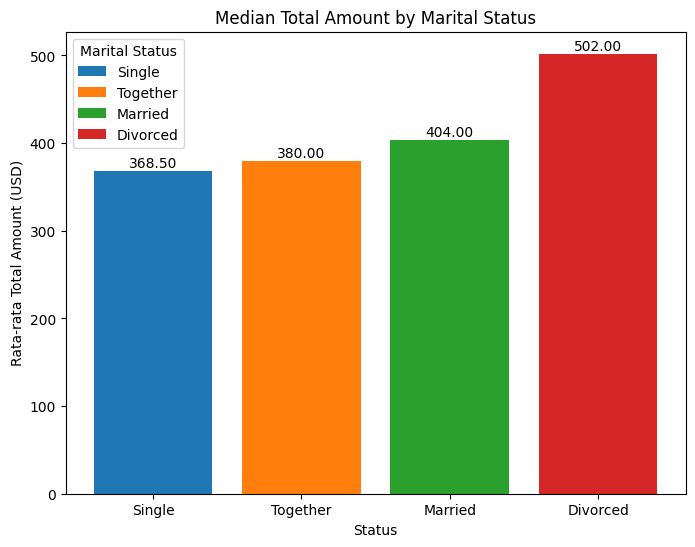

In [225]:
# Membuat bar rata-rata pembayaran yang dikeluarkan oleh setiap Education
plt.figure(figsize=(8, 6))

education_groups = df['Marital_Status'].unique()
for education in education_groups:
    subset = df[df['Marital_Status'] == education]
    median_value = subset['MntTotal'].median()
    plt.bar(education, median_value, label=education)
    
    # Menambahkan angka tepatnya di atas setiap bar
    plt.text(education, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median Total Amount by Marital Status')
plt.xlabel('Status')
plt.ylabel('Rata-rata Total Amount (USD)')
plt.legend(title='Marital Status')  
plt.show()

Berdasarkan pada Tabel diatas dapat disimpulkan bahwa :
1. Divorced Customers: Dengan Median Total Amount sebesar 502 USD, pelanggan ini tampaknya paling banyak menghabiskan uang di supermarket. Ini bisa menjadi indikasi bahwa segmen ini mungkin lebih terbuka untuk membeli produk premium atau dalam jumlah besar.

2. Married Customers: Dengan Median Total Amount sebesar 404 USD, pelanggan ini juga merupakan kontributor signifikan untuk pendapatan Supermarket. Memiliki strategi retensi dan up-selling yang efektif bisa sangat bermanfaat untuk segmen ini.

3. Together Customers: Dengan Median Total Amount sebesar 380 USD, pelanggan yang hidup bersama ini cenderung dekat dengan pelanggan yang menikah dalam hal pengeluaran. Ini menunjukkan bahwa meskipun mereka belum menikah, pola belanja mereka cukup mirip.

4. Single Customers: Dengan Median Total Amount terendah, sebesar 368.5 USD, pelanggan ini mungkin lebih selektif dalam pembelian mereka. Strategi seperti diskon atau promosi mungkin lebih efektif untuk segmen ini.

### **Tabel Campaign yang diterima Berdasarkan Marital Status**

In [226]:
# Membuat agregating total campaign yang diterima berdasarkan Marital Status
df[['Marital_Status','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Marital_Status').sum().reset_index()

,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Divorced,16,6,19,28,20
1,Married,60,6,59,60,59
2,Single,31,5,39,30,30
3,Together,28,9,34,40,38


Dari tabel Agregating tiap Campaign berdasarkan Marital Status dapat disimpulkan bahwa :
1. Martial Status Customer yang Married paling banyak menerima kampanye
2. AcceptedCmp2 (Campaign 2) tampaknya kurang efektif di semua segmen pelanggan dibandingkan dengan kampanye lainnya.

saran :
1. Target Married Customers: Mengingat responsivitas mereka yang tinggi, pertimbangkan untuk melakukan lebih banyak kampanye yang dirancang khusus untuk pelanggan menikah.
2. Reevaluate AcceptedCmp2: Pertimbangkan untuk mengevaluasi ulang atau mengoptimalkan kampanye ini, karena tampaknya strategi yang digunakan kurang efektif di semua segmen pelanggan.

## **Analysis Berdasarkan Education**

### **Proporsi Tingkat Pendidikan Pelanggan disupermarket**

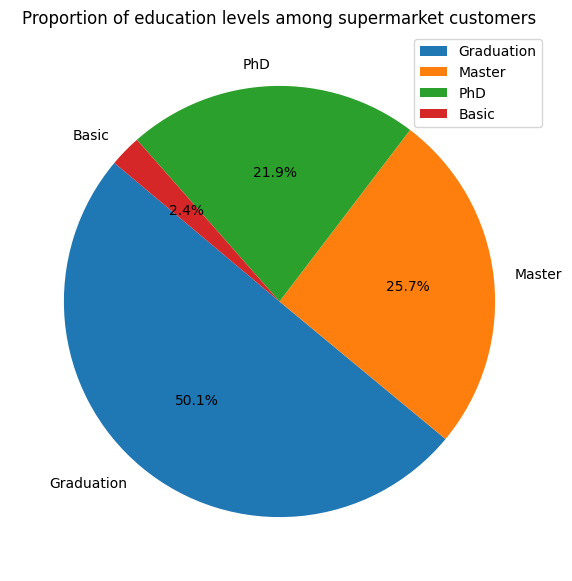

In [227]:
# Membuat diagram lingkaran untuk distribusi kategori pendidikan
plt.figure(figsize=(7, 7))
education_counts = df['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of education levels among supermarket customers')
plt.legend()
plt.show()

Dari hasil Pie Chart diatas dapat kita simpulkan :
1. 50% dari keseluruhan distribusi tingkat pendidikan yang dimiliki Customer adalah Graduation
2. Pelanggan yang tingkat pendidikannya Basic merupakan distribusi yang paling sedikit  2.4%

### **Distribusi Income Category berdasarkan Tingkat Pendidikan**

In [228]:
# Melakukan Value Counts Income Category berdasarkan Generation
df[['Education','Income_Category']].groupby('Education').value_counts().reset_index()

,Education,Income_Category,count
0,Basic,Low,49
1,Graduation,Very High,278
2,Graduation,Low,260
3,Graduation,High,250
4,Graduation,Middle,241
5,Master,Middle,150
6,Master,Low,135
7,Master,High,125
8,Master,Very High,117
9,PhD,High,139


Graduation & Very High Income: Dengan 278 pelanggan, ini adalah segmen terbesar. Ini menunjukkan bahwa pelanggan dengan pendidikan "Graduation" dan pendapatan "Very High" bisa menjadi target utama Supermarket.

### **Bar Chart Median Total Pengeluaran Berdasarkan Tingkat Pendidikan**

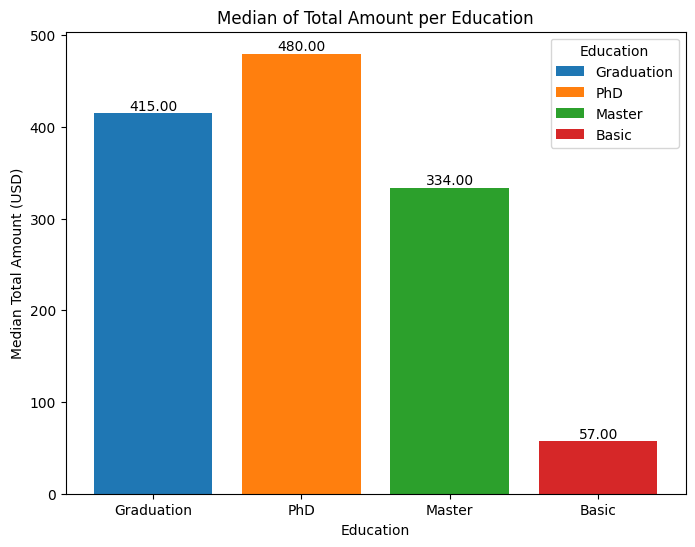

In [229]:
# Membuat bar rata-rata pembayaran yang dikeluarkan oleh setiap Education
plt.figure(figsize=(8, 6))

education_groups = df['Education'].unique()
for education in education_groups:
    subset = df[df['Education'] == education]
    median_value = subset['MntTotal'].median()
    plt.bar(education, median_value, label=education)
    
    # Menambahkan angka tepatnya di atas setiap bar
    plt.text(education, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median of Total Amount per Education')
plt.xlabel('Education')
plt.ylabel('Median Total Amount (USD)')
plt.legend(title='Education')  
plt.show()

Dari Bar Chart diatas dapat kita simpulkan bahwa :
1. Customer yang memiliki gelar PhD memiliki nilai median Total Pengeluaran tertinggi yaitu sebesar 480 $
2. Customer yang memiliki gelar Basic memiliki nilai mediam Total Pengeluaran terendah yaitu sebesar 57 $

### **Tabel Rata-Rata Pengeluaran Berdasarkan Tingkat Pendidikan**

In [230]:
# Membuat Agregasi Median setiap kategori produk berdasarkan Education
df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']].groupby('Education').median().reset_index().sort_values(by='MntTotal',ascending=False)

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
3,PhD,267.0,4.0,69.0,6.0,3.0,16.0,480.0
1,Graduation,183.0,10.0,81.0,15.0,12.0,29.0,415.0
2,Master,156.0,8.0,60.0,12.0,8.0,24.0,334.0
0,Basic,2.0,7.0,7.0,10.0,7.0,15.0,57.0


**Kesimpulan**

1. PhD: Pelanggan dengan tingkat pendidikan PhD cenderung menghabiskan uang paling banyak, khususnya pada kategori wine (MntWines) dengan rata-rata pengeluaran sekitar 267.0 USD. Total pengeluaran rata-rata adalah 480.0 USD.

2. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" juga menghabiskan cukup banyak, terutama pada kategori daging (MntMeatProducts) dan produk emas (MntGoldProds). Total pengeluaran rata-rata adalah 415.0 USD.

3. Master: Pelanggan ini memiliki pengeluaran yang lebih rendah dibandingkan dengan dua kategori di atas tetapi masih signifikan, dengan total rata-rata sekitar 334.0 USD.

4. Basic: Pelanggan dengan pendidikan dasar memiliki pengeluaran yang paling rendah di semua kategori. Total pengeluaran rata-rata adalah 57.0 USD.

### **Tabel Campaign yang diterima Berdasarkan Education**

In [231]:
# Membuat agregasi total setiap kampanye yang diterima berdasarkan Education
df[['Education','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Education').sum().reset_index()

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Basic,0,0,5,0,0
1,Graduation,77,14,73,76,76
2,Master,30,4,37,39,36
3,PhD,28,8,36,43,35


Kesimpulan:
1. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" tampaknya paling responsif terhadap hampir semua kampanye pemasaran, dengan jumlah penerimaan berkisar antara 73 hingga 77. Ini konsisten dengan data pengeluaran mereka yang termasuk tinggi.

2. Master and PhD: Meskipun jumlahnya lebih kecil dibandingkan dengan "Graduation", pelanggan dengan tingkat pendidikan "Master" dan "PhD" juga menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Basic: sesuai dengan data pengeluaran, pelanggan dengan pendidikan dasar hampir tidak menunjukkan respons terhadap kampanye pemasaran, kecuali untuk AcceptedCmp3.

Rekomendasi:
1. Fokus pada Graduation: Mengingat responsivitas mereka yang tinggi, lebih banyak kampanye yang dirancang khusus untuk segmen ini bisa sangat efektif.

2. Optimalisasi untuk Master dan PhD: Untuk segmen ini, fokus pada kampanye yang telah terbukti efektif, seperti AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Evaluasi Kampanye: AcceptedCmp2 tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis berdasarkan Generasi**

### **Proporsi Generasi Pelanggan Di Supermarket**

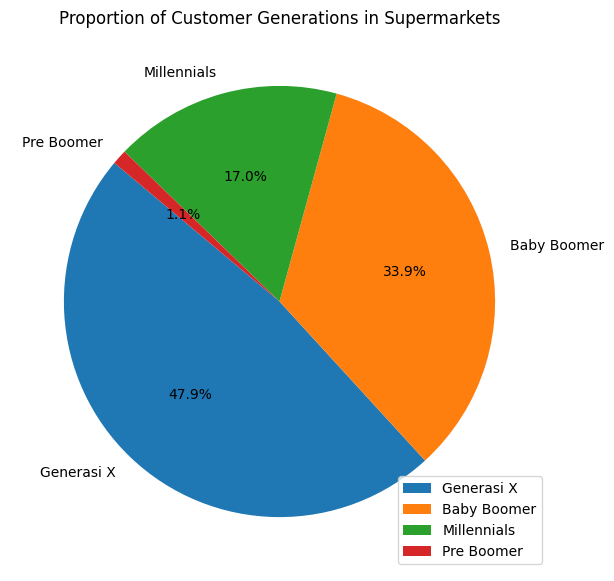

In [232]:
# Membuat Pie Chart untuk distribusi generasi
plt.figure(figsize=(7, 7))
education_counts = df['Generation'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customer Generations in Supermarkets')
plt.legend()
plt.show()

Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
1. Generasi X memiliki proporsi terbesar pada generasi customer yaitu sebesar 47.9 %
2. Generasi Baby Boomer juga memiliki proporsi yang lumayan besar di bawah Generasi X yaitu sebesar 33,9%
3. Genarasi Pre Boomer memiliki proporsi paling kecil yaitu hanya sebesar 1.1%

### **Distribusi Income Category Berdasarkan Generasi**

In [233]:
# Melakukan Agregating Income Category berdasarkan Generation
df[['Generation','Income_Category']].groupby('Generation').value_counts().reset_index()

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\266708978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Generation','Income_Category']].groupby('Generation').value_counts().reset_index()


,Generation,Income_Category,count
0,Pre Boomer,Very High,10
1,Pre Boomer,High,8
2,Pre Boomer,Middle,5
3,Pre Boomer,Low,0
4,Baby Boomer,High,228
5,Baby Boomer,Very High,198
6,Baby Boomer,Middle,177
7,Baby Boomer,Low,94
8,Generasi X,Low,269
9,Generasi X,Middle,262


Kesimpulan :
1. Baby Boomer: Generasi ini cenderung memiliki pendapatan yang lebih tinggi, dengan 228 pelanggan berada dalam kategori "High" dan 198 pelanggan dalam kategori "Very High".

2. Generasi X: Meskipun ini adalah generasi dengan jumlah pelanggan terbanyak di kategori "Low" (269 pelanggan), mereka juga memiliki distribusi yang cukup merata di semua kategori pendapatan.

### **Median Total Pengeluaran berdasarkan Generasi**

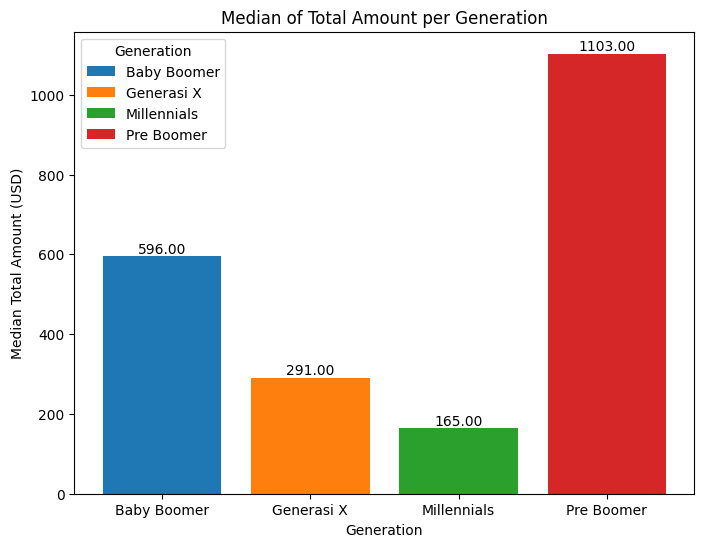

In [234]:
# Membuat bar median pembayaran yang dikeluarkan oleh setiap Generation
plt.figure(figsize=(8, 6))

generation_groups = df['Generation'].unique()
for generation in generation_groups:
    subset = df[df['Generation'] == generation]
    median_value = subset['MntTotal'].median()
    plt.bar(generation, median_value, label=generation)
    
    # Menambahkan angka tepatnya di atas setiap bar
    plt.text(generation, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median of Total Amount per Generation')
plt.xlabel('Generation')
plt.ylabel('Median Total Amount (USD)')
plt.legend(title='Generation')  
plt.show()

Dari Bar Chart diatas dapat kita simpulkan bahwa :
1. Customer yang generasi pre boomer memiliki nilai median Total Pengeluaran tertinggi yaitu sebesar 1103 $
2. Customer yang generasi Millennials memiliki nilai mediam Total Pengeluaran terendah yaitu sebesar 165 $

### **Tabel Rata Rata Pengeluaran berdasarkan Generasi**

In [235]:
# Membuat Agregasi Median setiap pengeluaran pada kategori produk berdasarkan Education
df[['Generation','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']].groupby('Generation').median().reset_index().sort_values(by='MntTotal',ascending=False)

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\2678311639.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'MntGoldProds','MntTotal']].groupby('Generation').median().reset_index().sort_values(by='MntTotal',ascending=False)


,Generation,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
0,Pre Boomer,508.0,38.0,249.0,55.0,23.0,26.0,1103.0
1,Baby Boomer,292.0,11.0,97.0,15.0,11.0,30.0,596.0
2,Generasi X,139.0,6.0,52.5,10.0,7.0,21.0,291.0
3,Millennials,47.5,8.0,48.5,13.0,9.0,22.0,165.0


Kesimpulan:
1. Pre Boomer: Generasi ini memiliki rata-rata pengeluaran tertinggi di hampir semua kategori produk, dengan total rata-rata pengeluaran sebesar 1103.0. Rata-rata pengeluaran tertinggi mereka adalah pada kategori produk Wine dengan 508.0, diikuti oleh produk Meat dengan 249.0.

2. Baby Boomer: Generasi ini memiliki rata-rata pengeluaran sebesar 596.0. Meski lebih rendah dibandingkan Pre Boomer, Baby Boomer memiliki rata-rata pengeluaran yang cukup tinggi untuk kategori produk Wine, yaitu 292.0.

3. Generasi X: Dengan rata-rata pengeluaran total sebesar 291.0, Generasi X memiliki rata-rata pengeluaran tertinggi untuk kategori produk Wine (139.0) dan produk Meat (52.5).

4. Millennials: Generasi ini memiliki rata-rata pengeluaran total yang paling rendah, yaitu 165.0. Namun, mereka menunjukkan kecenderungan yang hampir seimbang dalam rata-rata pengeluaran untuk kategori produk Wine, Meat, dan Fish dengan masing-masing 47.5, 48.5, dan 13.0.

Rekomendasi:
1. Produk Premium untuk Baby Boomer dan Pre Boomer: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, pertimbangkan untuk menawarkan produk atau layanan premium untuk generasi ini.

2. Varietas untuk Generasi X: Karena Generasi X memiliki pengeluaran yang lebih merata di berbagai kategori, bundling produk atau menawarkan variasi mungkin akan efektif.

3. Produk Terjangkau untuk Millennials: Fokus pada penawaran produk atau layanan yang lebih terjangkau.

### **Tabel Campaign yang diterima berdasarkan Generasi**

In [236]:
# Membuat agregasi total campaign yang diterima disetiap generasi
df[['Generation','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Generation').sum().reset_index()

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\2134397097.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'AcceptedCmp4', 'AcceptedCmp5']].groupby('Generation').sum().reset_index()


,Generation,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Pre Boomer,2,0,2,2,4
1,Baby Boomer,53,11,38,68,48
2,Generasi X,47,10,69,67,53
3,Millennials,33,5,42,21,42


Kesimpulan:
1. Pre Boomer: paling sedikit dalam menerima campaign tetapi dikarenakan populasi nya yang paling sedikit masih bisa dibilang memiliki responsivitas yang lumayan terhadap kampanye

2. Baby Boomer: menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama pada AcceptedCmp1, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Generasi X : Menunjukan responsivitas tertinggi terhadap kampanye AcceptedCmp3 dan AcceptedCmp4

Rekomendasi:
1. Evaluasi Kampanye: AcceptedCmp2 tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis Berdasarkan Income Category**

### **Pie Chart Proporsi dari Income Category**

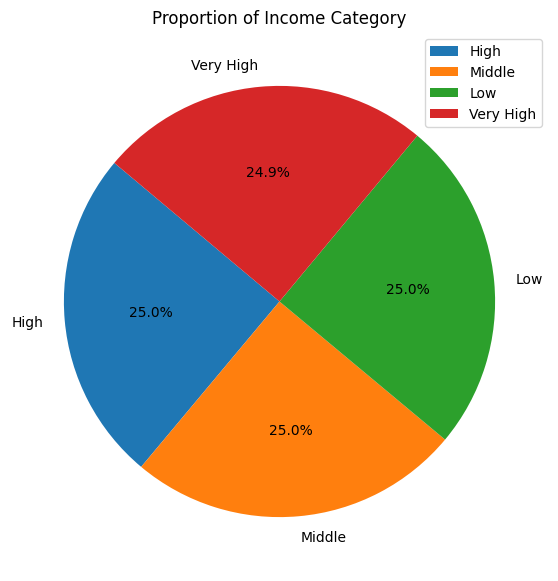

In [237]:
# Membuat diagram lingkaran untuk distribusi kategori Income
plt.figure(figsize=(7, 7))
education_counts = df['Income_Category'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Income Category')
plt.legend()
plt.show()

Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
- Distribusi kategori Income pada pelanggan adalah merata , yang bisa disimpulkan bahwa pelanggan dari supermarket merupakan semua kalangan pendapatan mulai dari yang pendapatan rendah hingga pendapatan yang tinggi.

### **Tabel Rata - Rata Pengeluaran berdasarkan Income Category**

In [238]:
df[['Income_Category','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']].groupby('Income_Category').median().reset_index().sort_values(by='MntTotal',ascending=False)

,Income_Category,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
3,Very High,587.0,44.5,413.0,72.0,48.0,50.0,1368.5
0,High,376.0,14.0,115.0,16.5,13.0,40.0,728.0
2,Middle,74.5,3.0,30.0,4.0,3.0,16.0,159.0
1,Low,10.0,3.0,12.0,4.0,3.0,9.5,53.0


Kesimpulan:
1. Very High Income: Pelanggan dengan pendapatan "Very High" cenderung menghabiskan paling banyak di semua kategori, dengan total rata-rata pengeluaran mencapai 1368.5 USD. Mereka terutama menghabiskan banyak di kategori wine (MntWines) dan produk daging (MntMeatProducts).

2. High Income: Meskipun lebih rendah dibandingkan dengan kategori "Very High", pelanggan ini juga memiliki pengeluaran yang signifikan, terutama di kategori wine (MntWines), dengan total rata-rata pengeluaran sekitar 728.0 USD.

3. Middle Income: Pengeluaran pelanggan ini jauh lebih rendah, dengan total rata-rata hanya sekitar 159.0 USD.

4. Low Income: Pelanggan dengan pendapatan "Low" memiliki total pengeluaran rata-rata yang paling rendah, yaitu sekitar 53.0 USD.

Rekomendasi:
1. Produk Premium untuk Very High Income: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, produk atau layanan premium akan sangat menarik bagi segmen ini.

2. Wine Promotions untuk High Income: Karena pelanggan ini cenderung menghabiskan lebih banyak pada wine, pertimbangkan untuk menawarkan promosi atau diskon khusus pada kategori ini.

3. Value Deals untuk Middle Income: Karena pelanggan ini memiliki pengeluaran yang lebih rendah, paket nilai atau diskon mungkin akan efektif untuk meningkatkan total pengeluaran mereka.

4. Affordable Options untuk Low Income: Untuk segmen ini, melakukan fokus pada menawarkan produk atau layanan yang lebih terjangkau.

### **Tabel Campaign Berdasarkan Income Categpry**

In [239]:
# Membuat agregasi total campaign yang diterima pada Income Category
df[['Income_Category','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Income_Category').sum().reset_index()

,Income_Category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,High,18,9,28,62,8
1,Low,0,0,40,1,0
2,Middle,4,3,44,25,2
3,Very High,113,14,39,70,137


Kesimpulan:
1. Very High Income: Pelanggan dalam kategori ini cenderung sangat responsif terhadap semua kampanye, terutama  pada AcceptedCmp5, dengan 137 pelanggan menerima kampanye ini. Ini konsisten dengan pola pengeluaran mereka, yang juga tinggi.

2. High Income: Meskipun jumlahnya lebih kecil dibandingkan dengan "Very High", pelanggan ini juga menunjukkan minat yang relatif tinggi, terutama pada AcceptedCmp4.

3. Middle Income: Responsivitasnya lebih rendah dibandingkan dengan kategori pendapatan yang lebih tinggi, tetapi AcceptedCmp3 tampaknya paling efektif di segmen ini.

4. Low Income: Seperti pada pola pengeluaran mereka, responsivitas terhadap kampanye pemasaran hampir nol, kecuali untuk AcceptedCmp3.

## **RFM Analysis**

In [240]:
# Membuat Dataset baru untuk membuat RFM
df_rfm = df[['ID','Recency','Freq_Purchases','MntTotal']]
df_rfm.rename(columns={'ID': 'Customer ID', 'Recency': 'Recency', 'Freq_Purchases': 'Frequency', 'MntTotal': 'Monetary'}, inplace=True)
df_rfm

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\3000386175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm.rename(columns={'ID': 'Customer ID', 'Recency': 'Recency', 'Freq_Purchases': 'Frequency', 'MntTotal': 'Monetary'}, inplace=True)


,Customer ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2232,8080,50,3,22
2235,10870,46,16,1341
2237,7270,91,18,1241
2238,8235,8,21,843


In [241]:
# Membuat Rank dari setiap RFM
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False, method = 'dense')
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True, method = 'dense')
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True, method = 'dense')

df_rfm.sort_values(by='Recency')

C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\173403035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False, method = 'dense')
C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\173403035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True, method = 'dense')
C:\Users\ramad\AppData\Local\Temp\ipykernel_1452\173403035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Customer ID,Recency,Frequency,Monetary,R Rank,F Rank,M Rank
810,2964,0,4,72,100.0,5.0,67.0
1089,7348,0,16,1192,100.0,17.0,737.0
1200,837,0,8,174,100.0,9.0,156.0
100,1473,0,5,72,100.0,6.0,67.0
1537,10530,0,15,1156,100.0,16.0,714.0
...,...,...,...,...,...,...,...
208,868,99,5,65,1.0,6.0,60.0
1033,5263,99,4,55,1.0,5.0,50.0
1800,2831,99,24,1179,1.0,25.0,728.0
491,22,99,12,309,1.0,13.0,250.0


In [242]:
# Membuat Dataset baru yang hanya berisikan Ranking RFM
df_rank = df_rfm[['Customer ID','R Rank','F Rank','M Rank']]
df_rank

,Customer ID,R Rank,F Rank,M Rank
0,5524,42.0,23.0,908.0
1,2174,62.0,5.0,22.0
2,4141,74.0,21.0,504.0
3,6182,74.0,7.0,48.0
4,5324,6.0,15.0,321.0
...,...,...,...,...
2232,8080,50.0,4.0,17.0
2235,10870,54.0,17.0,800.0
2237,7270,9.0,19.0,760.0
2238,8235,92.0,22.0,538.0


In [243]:
# Membuat Score RFM
r_quartiles = pd.qcut(df_rank['R Rank'],4, labels = range(4,0,-1))
f_quartiles = pd.cut(df_rank['F Rank'],4, labels = range(1,5))
m_quartiles = pd.cut(df_rank['M Rank'],4, labels = range(1,5))

df_rank = df_rank.assign( R = r_quartiles)
df_rank = df_rank.assign( F = f_quartiles)
df_rank = df_rank.assign( M = m_quartiles)

df_rank

,Customer ID,R Rank,F Rank,M Rank,R,F,M
0,5524,42.0,23.0,908.0,3,3,4
1,2174,62.0,5.0,22.0,2,1,1
2,4141,74.0,21.0,504.0,2,3,2
3,6182,74.0,7.0,48.0,2,1,1
4,5324,6.0,15.0,321.0,4,2,2
...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1
2235,10870,54.0,17.0,800.0,2,2,4
2237,7270,9.0,19.0,760.0,4,3,3
2238,8235,92.0,22.0,538.0,1,3,3


In [244]:
# melihat info dari dataset df_rank
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  2054 non-null   int64   
 1   R Rank       2054 non-null   float64 
 2   F Rank       2054 non-null   float64 
 3   M Rank       2054 non-null   float64 
 4   R            2054 non-null   category
 5   F            2054 non-null   category
 6   M            2054 non-null   category
dtypes: category(3), float64(3), int64(1)
memory usage: 86.6 KB


In [245]:
# Merubah Tipe Data menjadi Integer
df_rank['R'] = df_rank['R'].astype(int)
df_rank['F'] = df_rank['F'].astype(int)
df_rank['M'] = df_rank['M'].astype(int)

In [246]:
# Membuat Kolom Baru
df_rank['RFM SCORE'] = df_rank['R'] + df_rank['F'] + df_rank['M']
df_rank

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE
0,5524,42.0,23.0,908.0,3,3,4,10
1,2174,62.0,5.0,22.0,2,1,1,4
2,4141,74.0,21.0,504.0,2,3,2,7
3,6182,74.0,7.0,48.0,2,1,1,4
4,5324,6.0,15.0,321.0,4,2,2,8
...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5
2235,10870,54.0,17.0,800.0,2,2,4,8
2237,7270,9.0,19.0,760.0,4,3,3,10
2238,8235,92.0,22.0,538.0,1,3,3,7


In [247]:
# Memberikan Label disetiap Score
def segment(df_rank) :
    if df_rank['RFM SCORE'] >= 8 :
        return 'Loyal Customer'
    elif (df_rank['RFM SCORE'] >= 6) and (df_rank['RFM SCORE'] < 8) :
        return 'Good Customer'
    elif (df_rank['RFM SCORE'] >= 4) and (df_rank['RFM SCORE'] < 6) :
        return 'Potential Lost Customer'
    else :
        return 'Bad Customer'

df_rank['Segment'] = df_rank.apply(segment, axis=1)

df_rank

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE,Segment
0,5524,42.0,23.0,908.0,3,3,4,10,Loyal Customer
1,2174,62.0,5.0,22.0,2,1,1,4,Potential Lost Customer
2,4141,74.0,21.0,504.0,2,3,2,7,Good Customer
3,6182,74.0,7.0,48.0,2,1,1,4,Potential Lost Customer
4,5324,6.0,15.0,321.0,4,2,2,8,Loyal Customer
...,...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5,Potential Lost Customer
2235,10870,54.0,17.0,800.0,2,2,4,8,Loyal Customer
2237,7270,9.0,19.0,760.0,4,3,3,10,Loyal Customer
2238,8235,92.0,22.0,538.0,1,3,3,7,Good Customer


### **Pie Chart RFM Analysis**

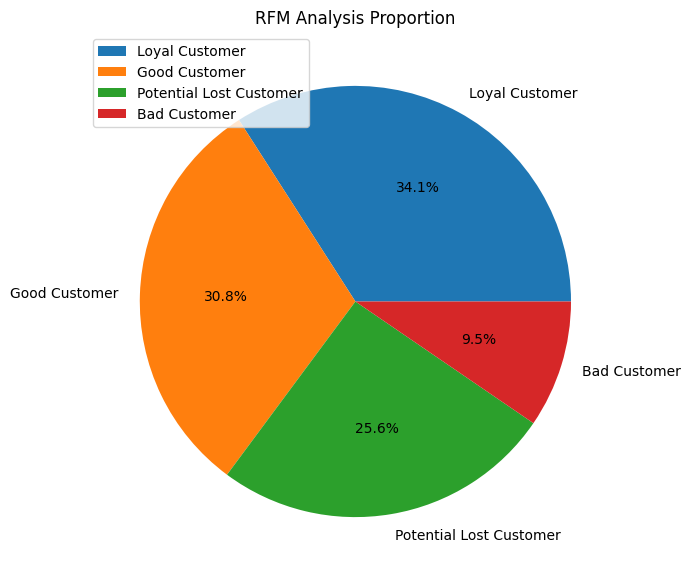

In [248]:
# Membuat Pie Chart
plt.figure(figsize=(7,7))
segment = df_rank['Segment'].value_counts()
plt.pie(segment,labels=segment.index,autopct='%1.1f%%')
plt.title('RFM Analysis Proportion')
plt.legend(loc='upper left')
plt.show()

**Kesimpulan Berdasarkan RFM Analysis**
1. Loyal Customer (34.1%): Segmen ini menunjukkan bahwa supermarket memiliki basis pelanggan yang setia. Ini adalah indikator yang baik dan menunjukkan bahwa strategi retensi pelanggan supermarket cukup efektif.

2. Good Customer (30.8%): Segmen ini juga cukup besar, menunjukkan bahwa supermarket memiliki banyak pelanggan yang membeli di Supermarkey dengan frekuensi dan jumlah yang cukup tinggi. Ini adalah pelanggan yang kemungkinan akan menjadi "Loyal Customer" jika dikelola dengan benar.

3. Potential Lost Customer (25.6%): Persentase ini cukup tinggi, menunjukkan bahwa ada risiko kehilangan sejumlah besar pelanggan jika tindakan tidak diambil untuk meningkatkan retensi.

4. Bad Customer (9.5%): Meskipun persentasenya lebih kecil dibandingkan dengan segmen lain, ini menunjukkan pelanggan yang mungkin tidak menemukan nilai yang ditawarkan oleh supermarket atau pelanggan yang baru saja mencoba layanan dan belum memutuskan untuk kembali.

**Rekomendasi Berdasarkan RFM Analysis:**
1. Untuk Loyal dan Good Customer: Pertahankan dan dorong mereka untuk berbelanja lebih banyak melalui program loyalitas atau penawaran khusus.

2. Untuk Potential Lost Customer: Cari tahu alasan mereka berpotensi meninggalkan supermarket dan buat strategi untuk menarik mereka kembali—mungkin melalui penawaran khusus, diskon, atau komunikasi yang lebih efektif.

3. Untuk Bad Customer: Evaluasi apakah memang layak untuk menghabiskan sumber daya untuk mengubah mereka menjadi pelanggan yang lebih baik, atau fokus pada segmen yang lebih menguntungkan.

4. Secara Umum: Tingkatkan pelayanan pelanggan dan kualitas produk untuk semua segmen untuk meningkatkan keseluruhan kepuasan pelanggan.


## **Kesimpulan**

1. **Karakteristik/perilaku customer dan pola belanjanya adalah:**
- Pelanggan paling besar melakukan pengeluaran pada product Wine dan Meat.
- Sweet Product dan Fruit Product memiliki pengeluaran terendah oleh Pelanggan.
- Dari uji korelasi, ada korelasi yang sangat kuat antara pembelian Wine (MntWines) dan total pengeluaran (MntTotal) dengan nilai korelasi 0.93, Ini menunjukkan bahwa pelanggan yang membeli Wine cenderung juga membeli produk lain dan menghabiskan lebih banyak uang secara keseluruhan.

2. **Apakah Campaign yang dilakukan diterima dengan baik oleh pelanggan**:
- Kampanye yang paling diterima dan mendapatkan respon baik oleh pelanggan adalah AcceptedLastCmp (pelanggan menerima penawaran di kampanye terakhir) yang mana dapat membuat 313 customer menerima penawaran dari kampanye tersebut
- Kampanye yang tidak tepat sasaran/strategi yang kurang bagus ada pada AcceptedCmp2 (Kampanye ke 2) dimana hanya dapat membuat 26 customer meneruma penawaran dari kampanye tersebut
- Efektivitas Campaign: Pelanggan dengan pendapatan "Very High" dan "High" serta tingkat pendidikan "Graduation" cenderung lebih responsif dalam menerima Campaign

3. **Pada platform apa customer lebih sering melakukan transaksu ? (Store, Web, dan Catalogue)**: 
- Store: Sebagai saluran dengan proporsi pembelian terbesar (46.1%), ini menunjukkan bahwa toko fisik masih menjadi pilihan utama bagi pelanggan Supermarket.
- Web: Dengan proporsi (32.7%), pembelian online juga menjadi saluran yang cukup populer, menunjukkan kecenderungan konsumen yang semakin digital.
- Catalogue: Meskipun memiliki proporsi lebih kecil (21.2%), katalog masih menjadi saluran yang relevan dan mungkin menarik bagi segmen pelanggan tertentu.

4. **Segmentasi Customer dengan RFM Analysis adalah sebagai berikut:**: 
- Loyal Customer (34.2%): Segmen ini menunjukkan bahwa supermarket memiliki basis pelanggan yang setia. Ini adalah indikator yang baik dan menunjukkan bahwa strategi retensi pelanggan supermarket cukup efektif.

- Good Customer (30.7%): Segmen ini juga cukup besar, menunjukkan bahwa supermarket memiliki banyak pelanggan yang membeli di Supermarkey dengan frekuensi dan jumlah yang cukup tinggi. Ini adalah pelanggan yang kemungkinan akan menjadi "Loyal Customer" jika dikelola dengan benar.

- Potential Lost Customer (25.6%): Persentase ini cukup tinggi, menunjukkan bahwa ada risiko kehilangan sejumlah besar pelanggan jika tindakan tidak diambil untuk meningkatkan retensi.

- Bad Customer (9.5%): Meskipun persentasenya lebih kecil dibandingkan dengan segmen lain, ini menunjukkan pelanggan yang mungkin tidak menemukan nilai yang ditawarkan oleh supermarket atau pelanggan yang baru saja mencoba layanan dan belum memutuskan untuk kembali.

## **Rekomendasi**:

1. **Segmentasi Target**: 
- Fokuskan sumber daya pemasaran dan penjualan pada segmen pelanggan yang telah terbukti responsif terhadap kampanye dan memiliki tingkat pengeluaran yang tinggi. Strategi ini dapat digunakan untuk meningkatkan penjualan secara efektif.

2. **Strategi Channel dari Supermarket**:

- Tingkatkan pengalaman berbelanja di Store (toko fisik), karena ini adalah saluran paling populer.
- Investasikan dalam peningkatan situs Web untuk menarik lebih banyak pelanggan online.
- Pertimbangkan personalisasi katalog untuk pelanggan yang lebih suka berbelanja melalui saluran ini.

3. **Optimasi Produk dan Penawaran**:

- Pertimbangkan paket bundling untuk kategori produk yang sering dibeli bersama, seperti Wine dan Meat.
- Tawarkan promosi atau diskon pada kategori produk yang kurang populer seperti Sweet Producy dan Sweet Product untuk mendorong penjualan.
- Optimalkan Campaign: Evaluasi dan sesuaikan kampanye pemasaran yang kurang efektif, terutama untuk segmen demografis yang menunjukkan respons yang lebih rendah.
- Lakukan evaluasi terhadap Campaign 2 karena terbukti kurang efektif dan jarang diterima oleh pelanggan.

4. **Strategi Produk**: 
- Sesuaikan penawaran produk berdasarkan pola belanja pelanggan untuk meningkatkan penjualan dan kepuasan pelanggan.

5. **Manajemen Persediaan**: 
- Optimalisasi persediaan berdasarkan kategori produk yang paling sering dibeli untuk memastikan ketersediaan.

6. **Analisis Enrollment**: 
- Pertimbangkan untuk melakukan analisis lebih lanjut pada data pendaftaran pelanggan untuk mengetahui apakah ada musim atau periode tertentu yang efektif untuk mendapatkan pelanggan baru.


## **Gabungkan df dan df_rank berdasarkan ID** 

In [249]:
# Join df dan df_rank
df = df.join(df_rank)

In [250]:
# Check apakah sudah df_rank sudah masuk ke df atau belum 
display(df.head(), df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Generation,Income_Category,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,0,0,0,0,0,0,1,Baby Boomer,High,5524,42.0,23.0,908.0,3,3,4,10,Loyal Customer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,0,0,0,0,0,0,0,Baby Boomer,Middle,2174,62.0,5.0,22.0,2,1,1,4,Potential Lost Customer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,0,0,0,0,0,0,0,Generasi X,Very High,4141,74.0,21.0,504.0,2,3,2,7,Good Customer
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Millennials,Low,6182,74.0,7.0,48.0,2,1,1,4,Potential Lost Customer
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,0,0,0,0,0,0,0,Millennials,High,5324,6.0,15.0,321.0,4,2,2,8,Loyal Customer


(2054, 40)

In [251]:
# hapus kolom Customer ID karena sudah ada kolom ID
df.drop(columns='Customer ID', inplace=True)

In [252]:
df.shape

(2054, 39)

In [253]:
# save data to csv
df.to_csv('Supermarket_Customer_Cleaned.csv')